**Imports**

In [ ]:
import json
from pprint import pprint
import pandas as pd
import re

from nltk.tokenize import TweetTokenizer

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from pathlib import Path

# Constructing the basic dataset

In [ ]:
data_folder = Path('../data/twint')
tweets_file = data_folder / '2019_april_may_#uber_EN.txt'

In [3]:
f = open(tweets_file, 'r')
lines = [l for l in f]
f.close()

In [4]:
tweets = [json.loads(l) for l in lines]
unique_usernames = {t['username'] for t in tweets}

In [5]:
print('Number of tweets:\t%s' % len(tweets))

Number of tweets:	38493


## Top 10 Hashtags

In [6]:
hashtags = [h for t in tweets for h in t['hashtags']]

In [7]:
from collections import Counter
hashtags_count = pd.DataFrame.from_dict(Counter(hashtags), orient='index', columns=['count']).sort_values(by='count', ascending=False)[:10]
hashtags_count

,count
#uber,39109
#lyft,8089
#taxi,2499
#ipo,2028
#tfl,1503
#uk,1492
#rideshare,1380
#crypto,1282
#np,1248
#edm,1240


# Text preparation

## Concatening all the tweets (= document) for each user

In [8]:
users_to_tweets_list = {u:[] for u in list(unique_usernames)}

for t in tweets:
    username = t['username']
    users_to_tweets_list[username].append(t['tweet'].replace('\n', ''))

users_to_documents = {u:'' for u in list(unique_usernames)}
for u in unique_usernames:
    tweets_list = users_to_tweets_list[u]
    user_document = ''.join(tweets_list)
    users_to_documents[u] = user_document

## Tokenizing

In [9]:
tokenizer = TweetTokenizer()

In [10]:
users_to_documents = {u:tokenizer.tokenize(doc) for (u, doc) in users_to_documents.items()}

In [11]:
list(users_to_documents.items())[33]

('flowerboyharryy',
 ['Hungry',
  '?',
  'Get',
  '$',
  '5',
  'off',
  'your',
  'first',
  'order',
  'on',
  '#Uber',
  'Eats',
  'with',
  'my',
  'code',
  ':',
  'eats-milagrosc',
  '623ue',
  '.',
  'http://ubr.to/EatsGiveGet'])

## Filter out non-alpha characters

In [12]:
for u, d in users_to_documents.items():
    filtered = [token.lower() for token in d if token.isalpha()]
    users_to_documents[u] = filtered
    
list(users_to_documents.items())[33]

('flowerboyharryy',
 ['hungry',
  'get',
  'off',
  'your',
  'first',
  'order',
  'on',
  'eats',
  'with',
  'my',
  'code'])

##  Filter out stopwords

In [13]:
stop_words = stopwords.words('english')

for u, d in users_to_documents.items():
    filtered = [token.lower() for token in d if token not in stop_words]
    users_to_documents[u] = filtered

In [14]:
list(users_to_documents.items())[33]

('flowerboyharryy', ['hungry', 'get', 'first', 'order', 'eats', 'code'])

## Stemming

In [15]:
from nltk.stem import PorterStemmer

In [16]:
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

for u, d in users_to_documents.items():
    filtered = [stemmer.stem(token) for token in d]
    users_to_documents[u] = filtered

## Filtering out short words

In [17]:
for u, d in users_to_documents.items():
    filtered = [token for token in d if len(token) > 2]
    users_to_documents[u] = filtered

In [18]:
list(users_to_documents.items())[33]

('flowerboyharryy', ['hungri', 'get', 'first', 'order', 'eat', 'code'])

## Filtering out words that only consist of one repeated letter

In [19]:
for u, d in users_to_documents.items():
    filtered = [token for token in d if re.search(r'^(.)\1{2,}$', token) == None]
    users_to_documents[u] = filtered

In [20]:
list(users_to_documents.items())[388]

('sooopreciously',
 ['hungri',
  'get',
  'first',
  'order',
  'eat',
  'code',
  'hungri',
  'get',
  'first',
  'order',
  'eat',
  'code'])

## See document length distribution

In [21]:
lengths = sorted([len(doc) for doc in users_to_documents.values()], reverse=True)
slots = np.arange(10, lengths[0], 100).tolist()

slots_to_n_docs = {slot:0 for slot in slots}
for slot in slots:
    n_docs = len([doc for doc in users_to_documents.values() if len(doc) > slot])
    slots_to_n_docs[slot] = n_docs

slots_to_n_docs

{10: 8879,
 110: 247,
 210: 109,
 310: 65,
 410: 55,
 510: 39,
 610: 32,
 710: 28,
 810: 23,
 910: 22,
 1010: 20,
 1110: 19,
 1210: 16,
 1310: 14,
 1410: 14,
 1510: 12,
 1610: 11,
 1710: 11,
 1810: 10,
 1910: 10,
 2010: 10,
 2110: 10,
 2210: 10,
 2310: 9,
 2410: 9,
 2510: 9,
 2610: 9,
 2710: 8,
 2810: 8,
 2910: 8,
 3010: 8,
 3110: 8,
 3210: 8,
 3310: 8,
 3410: 7,
 3510: 6,
 3610: 6,
 3710: 5,
 3810: 4,
 3910: 3,
 4010: 3,
 4110: 3,
 4210: 3,
 4310: 2,
 4410: 2,
 4510: 2,
 4610: 2,
 4710: 2,
 4810: 2,
 4910: 2,
 5010: 2,
 5110: 2,
 5210: 2,
 5310: 2,
 5410: 2,
 5510: 2,
 5610: 2,
 5710: 2,
 5810: 2,
 5910: 2,
 6010: 2,
 6110: 2,
 6210: 2,
 6310: 2,
 6410: 2,
 6510: 2,
 6610: 2,
 6710: 2,
 6810: 2,
 6910: 2,
 7010: 2,
 7110: 2,
 7210: 2,
 7310: 2,
 7410: 2,
 7510: 2,
 7610: 2,
 7710: 2,
 7810: 2,
 7910: 2,
 8010: 2,
 8110: 2,
 8210: 2,
 8310: 1,
 8410: 1,
 8510: 1,
 8610: 1,
 8710: 1,
 8810: 1,
 8910: 1,
 9010: 1,
 9110: 1,
 9210: 1,
 9310: 1,
 9410: 1,
 9510: 1,
 9610: 1,
 9710: 1,
 981

## Filter out any users that now have less than 100 tokens

In [22]:
users_to_documents = {u:doc for (u, doc) in users_to_documents.items() if len(doc) >= 100}
print(len(users_to_documents.values()))

286


## Filter out any users with a very low token variety

In [23]:
def lexical_diversity_percentage(tokens):
    return len(set(tokens)) / len(tokens) * 100

users_to_documents = {u:doc for (u, doc) in users_to_documents.items() if lexical_diversity_percentage(doc) >= 10}
len(users_to_documents)

249

In [24]:
users_to_documents_df = pd.DataFrame.from_dict(users_to_documents, orient='index')
users_to_documents_df

,0,1,2,3,4,5,6,7,8,9,...,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221
iamalfr3do,disagre,accept,pool,worth,major,driver,speak,declin,pool,driver,...,None,None,None,None,None,None,None,None,None,None
newcastle_cabs,know,major,black,cab,driver,self,employ,class,sole,trader,...,None,None,None,None,None,None,None,None,None,None
lougise,trade,war,stock,worst,day,month,real,estat,agent,uber,...,None,None,None,None,None,None,None,None,None,None
thecarrotchaser,star,buy,food,pay,awesom,driver,encourag,cheapskat,passeng,tip,...,None,None,None,None,None,None,None,None,None,None
uw_cstv,threat,american,ride,hail,servic,like,conflict,trip,data,citi,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rankmyride2,uber,bear,alreadi,snap,share,avail,short,effect,dictat,low,...,None,None,None,None,None,None,None,None,None,None
pmpmagtoday,one,sell,point,driver,alway,avail,pick,rider,within,minut,...,None,None,None,None,None,None,None,None,None,None
avatrade,beat,earn,expect,btrade,open,tomorrow,retail,investor,account,lose,...,None,None,None,None,None,None,None,None,None,None
recepyi98226067,thousand,peopl,victim,turkey,author,uber,hear,situat,seriou,busi,...,None,None,None,None,None,None,None,None,None,None


# Constructing the Term/Document Matrix

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
docs = users_to_documents.values()

In [54]:
def do_nothing(tokens):
    return tokens

vectorizer = TfidfVectorizer(lowercase=False, tokenizer=do_nothing, min_df=0.2)

X = vectorizer.fit_transform(docs)

In [55]:
tf_idf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [56]:
tf_idf_df

,also,anoth,app,around,back,big,billion,busi,call,car,...,use,via,wait,want,way,week,work,world,would,year
0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.109640,0.00000,0.271531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.314919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.182933,0.505594,0.000000,0.0,0.145228
3,0.000000,0.238079,0.000000,0.11647,0.221949,0.117311,0.000000,0.000000,0.00000,0.000000,...,0.088951,0.000000,0.000000,0.096999,0.209488,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.063176,0.000000,0.00000,0.000000,...,0.055635,0.807097,0.000000,0.000000,0.000000,0.000000,0.057116,0.072847,0.0,0.057422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,0.000000,0.063159,0.000000,0.00000,0.000000,0.062242,0.053593,0.053277,0.05888,0.043981,...,0.000000,0.000000,0.064111,0.000000,0.111149,0.000000,0.000000,0.000000,0.0,0.048711
245,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.064701,0.000000,0.00000,0.000000,...,0.000000,0.375715,0.464399,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
246,0.000000,0.000000,0.040163,0.00000,0.000000,0.000000,0.310966,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
247,0.111621,0.000000,0.000000,0.00000,0.000000,0.114029,0.000000,0.878450,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088766,0.000000,0.0,0.000000


## Performing a PCA

In [57]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

## Scale data

In [58]:
data_scaled = pd.DataFrame(preprocessing.scale(tf_idf_df), columns=tf_idf_df.columns)
data_scaled

,also,anoth,app,around,back,big,billion,busi,call,car,...,use,via,wait,want,way,week,work,world,would,year
0,-0.410155,-0.417734,-0.525467,-0.411591,-0.394866,-0.426988,-0.501809,0.551356,-0.388446,1.699965,...,-0.535390,-0.358294,-0.378687,-0.525517,-0.491244,-0.352868,-0.540820,-0.403645,-0.536846,-0.549990
1,-0.410155,-0.417734,-0.525467,-0.411591,-0.394866,-0.426988,-0.501809,-0.421299,-0.388446,-0.590869,...,2.383975,-0.358294,-0.378687,-0.525517,-0.491244,-0.352868,-0.540820,-0.403645,-0.536846,-0.549990
2,-0.410155,-0.417734,-0.525467,-0.411591,-0.394866,-0.426988,-0.501809,-0.421299,-0.388446,-0.590869,...,-0.535390,-0.358294,-0.378687,-0.525517,-0.491244,1.760015,6.080414,-0.403645,-0.536846,1.144067
3,-0.410155,3.381945,-0.525467,1.881621,2.105413,1.865181,-0.501809,-0.421299,-0.388446,-0.590869,...,0.289208,-0.358294,-0.378687,0.775508,2.723182,-0.352868,-0.540820,-0.403645,-0.536846,-0.549990
4,-0.410155,-0.417734,-0.525467,-0.411591,-0.394866,-0.426988,0.039074,-0.421299,-0.388446,-0.590869,...,-0.019644,4.638997,-0.378687,-0.525517,-0.491244,-0.352868,0.207174,1.126971,-0.536846,0.119826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.410155,0.590269,-0.525467,-0.411591,-0.394866,0.789174,-0.042976,0.051341,0.408015,-0.219809,...,-0.535390,-0.358294,0.681917,-0.525517,1.214242,-0.352868,-0.540820,-0.403645,-0.536846,0.018218
245,-0.410155,-0.417734,-0.525467,-0.411591,-0.394866,-0.426988,0.052126,-0.421299,-0.388446,-0.590869,...,-0.535390,1.968018,7.303927,-0.525517,-0.491244,-0.352868,-0.540820,-0.403645,-0.536846,-0.549990
246,-0.410155,-0.417734,-0.145625,-0.411591,-0.394866,-0.426988,2.160522,-0.421299,-0.388446,-0.590869,...,-0.535390,-0.358294,-0.378687,-0.525517,-0.491244,-0.352868,-0.540820,-0.403645,-0.536846,-0.549990
247,1.272505,-0.417734,-0.525467,-0.411591,-0.394866,1.801056,-0.501809,7.371710,-0.388446,-0.590869,...,-0.535390,-0.358294,-0.378687,-0.525517,-0.491244,-0.352868,0.621651,-0.403645,-0.536846,-0.549990


In [59]:
data_scaled['strike'].sum()

-4.440892098500626e-15

In [60]:
## Perform the PCA

In [61]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(data_scaled)

## Analyze the percentage of explained variance per principal component

In [62]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.062227
1,0.048466
2,0.029331
3,0.028116
4,0.025055
5,0.024606
6,0.022866
7,0.020697
8,0.020215
9,0.019804


## 2D Plot

Text(0.5, 1.0, '2D Plot')

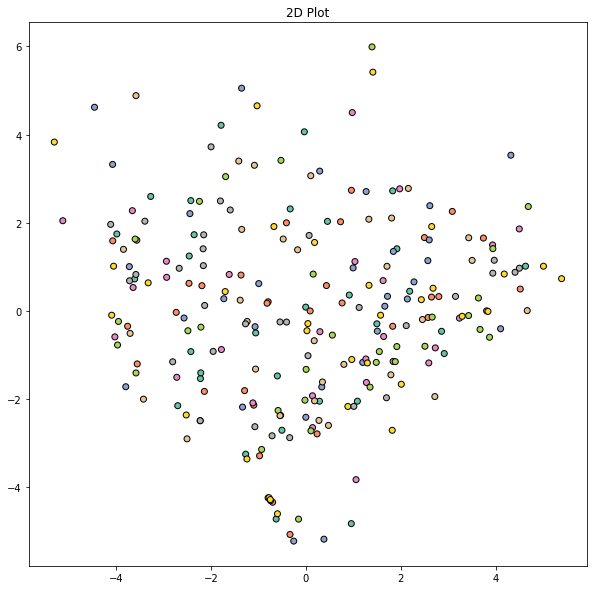

In [63]:
y = range(0, len(X_reduced))
plt.figure(1, figsize=(10, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set2, edgecolor='k')
plt.title('2D Plot')

## 3D Plot

Text(0.5, 0.92, 'PCA 3D Plot')

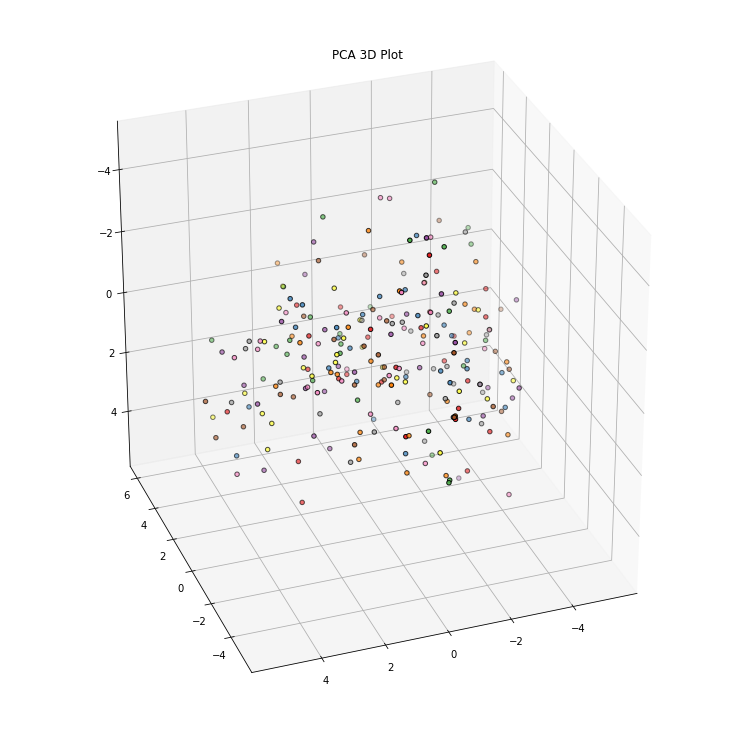

In [64]:
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, elev=-150, azim=110)
y = range(0, len(X_reduced))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("PCA 3D Plot")

## See the documents/users with highest MSE

In [65]:
inverse_transform_data = pca.inverse_transform(X_reduced)
MSE_score = ((data_scaled-inverse_transform_data)**2).sum(axis=1)

In [66]:
MSE_max_scores = list(MSE_score.nlargest(10).index)

In [67]:
docs_with_highest_mse_df = users_to_documents_df.iloc[MSE_max_scores]
docs_with_highest_mse_df

,0,1,2,3,4,5,6,7,8,9,...,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221
forwardmotionus,inform,collect,everyth,everyth,everyth,protect,futur,incom,select,candid,...,None,None,None,None,None,None,None,None,None,None
ruwansubasinghe,issu,advic,memorandum,conclud,driver,independ,contractor,employe,nlra,reli,...,None,None,None,None,None,None,None,None,None,None
choicesmatter_,liter,never,excus,let,friend,use,schedul,ahead,make,drink,...,None,None,None,None,None,None,None,None,None,None
jerry49878419,turn,peopl,want,invest,firm,major,loss,upsid,moral,compass,...,None,None,None,None,None,None,None,None,None,None
adriancroydon,anyon,say,safe,must,peculiar,childhood,polic,expens,unnessari,layer,...,None,None,None,None,None,None,None,None,None,None
testarossatx,free,histori,report,diesel,dream,diesel,call,today,shop,without,...,None,None,None,None,None,None,None,None,None,None
thegearsh,gig,economi,reshap,career,next,gener,via,self,taught,web,...,None,None,None,None,None,None,None,None,None,None
braidrunners,develop,urban,citi,servic,hair,type,global,citi,mani,develop,...,None,None,None,None,None,None,None,None,None,None
hustlekerfuffle,hit,multipl,normal,discuss,commun,realli,need,help,that,ran,...,None,None,None,None,None,None,None,None,None,None
tenablemusic,avail,everywher,wav,avail,everywher,avail,everywher,season,wast,wav,...,None,None,None,None,None,None,None,None,None,None


### See the length of the documents/users with highest MSE

In [68]:
usernames_with_highest_mse = list(docs_with_highest_mse_df.index)
lengths_of_docs_with_highest_mse_df = pd.DataFrame.from_dict({u:len(users_to_documents[u]) for u in usernames_with_highest_mse}, orient='index', columns=['count']).sort_values(by='count', ascending=False)
lengths_of_docs_with_highest_mse_df

,count
hustlekerfuffle,3383
adriancroydon,269
forwardmotionus,254
choicesmatter_,204
ruwansubasinghe,154
thegearsh,147
testarossatx,131
tenablemusic,131
braidrunners,109
jerry49878419,106


## See the documents/users with the lowest MSE

In [69]:
MSE_low_scores = list(MSE_score.nsmallest(10).index)

In [70]:
docs_with_lowest_mse_df = users_to_documents_df.iloc[MSE_low_scores]
docs_with_lowest_mse_df

,0,1,2,3,4,5,6,7,8,9,...,4212,4213,4214,4215,4216,4217,4218,4219,4220,4221
hacker_news_hir,uber,start,deactiv,rider,low,rate,comment,price,fix,legal,...,None,None,None,None,None,None,None,None,None,None
rmawaters,amazon,invest,deliveroo,rival,uber,food,deliveri,promis,billion,uber,...,None,None,None,None,None,None,None,None,None,None
sevillereport,everyth,said,term,profit,said,focu,uber,underwhelm,ipo,buy,...,None,None,None,None,None,None,None,None,None,None
milsonmuddassir,visit,omaha,get,around,free,lyft,free,ride,lyft,promo,...,None,None,None,None,None,None,None,None,None,None
traderscolony,uber,stock,rise,earn,fall,line,expect,uber,lyft,short,...,None,None,None,None,None,None,None,None,None,None
mallariyfc,want,free,ride,alamodom,free,lyft,lyft,credit,new,user,...,None,None,None,None,None,None,None,None,None,None
yzsombor,huski,stadium,total,free,lyft,lyft,credit,promo,code,vex,...,None,None,None,None,None,None,None,None,None,None
danoeshalome,want,free,ride,neyland,stadium,lyft,lyft,credit,new,user,...,None,None,None,None,None,None,None,None,None,None
dignitydriver,big,babi,got,limit,twitter,attack,dara,fuck,fuck,fuck,...,None,None,None,None,None,None,None,None,None,None
latticeworkwlth,tepid,respons,biggest,ipo,year,uber,richli,fund,privat,tech,...,None,None,None,None,None,None,None,None,None,None


### See the length of the documents/users with lowest MSE

In [71]:
usernames_with_lowest_mse = list(docs_with_lowest_mse_df.index)
lengths_of_docs_with_lowest_mse_df = pd.DataFrame.from_dict({u:len(users_to_documents[u]) for u in usernames_with_lowest_mse}, orient='index', columns=['count']).sort_values(by='count', ascending=False)
lengths_of_docs_with_lowest_mse_df

,count
danoeshalome,3635
mallariyfc,2645
yzsombor,2291
dignitydriver,1738
milsonmuddassir,1573
hacker_news_hir,250
traderscolony,203
latticeworkwlth,167
sevillereport,133
rmawaters,123


In [74]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important_feature_indexes_per_pc = {}

initial_feature_names = data_scaled.columns

for pc in range(n_pcs):
    components_enumerated = list(enumerate(np.abs(pca.components_[pc])))
    most_important = np.abs(pca.components_[pc]).argmax()
    components_sorted = sorted(components_enumerated, key=lambda x:x[1], reverse=True)
    features = [initial_feature_names[i] for (i, imp) in components_sorted]
    print(features[:10])

['ipo', 'get', 'price', 'drive', 'public', 'share', 'billion', 'stop', 'driver', 'trade']
['invest', 'profit', 'would', 'ride', 'much', 'make', 'year', 'compani', 'could', 'market']
['day', 'taxi', 'transport', 'servic', 'know', 'trade', 'app', 'wait', 'citi', 'busi']
['said', 'start', 'last', 'wait', 'driver', 'strike', 'employe', 'invest', 'got', 'year']
['ride', 'new', 'give', 'sinc', 'rider', 'use', 'like', 'world', 'day', 'citi']
['end', 'first', 'new', 'plan', 'last', 'taxi', 'give', 'today', 'stop', 'offer']
['passeng', 'driver', 'wait', 'use', 'one', 'plan', 'offer', 'report', 'week', 'know']
['world', 'sinc', 'around', 'day', 'ever', 'price', 'citi', 'look', 'rider', 'peopl']
['even', 'call', 'way', 'know', 'loss', 'market', 'profit', 'happen', 'ever', 'help']
['report', 'sinc', 'use', 'good', 'still', 'work', 'uber', 'money', 'said', 'lyft']
